In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import torch
import numpy as np # linear algebra
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


/home/junhal11/miniconda3/envs/pgm/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
def plot_sample_examples(datax, datay, mean_y, sample_ys):
    image_num = len(sample_ys) + 3
    fig, ax = plt.subplots(nrows=1, ncols=image_num, figsize=(4 * image_num, 4.5))
    
    ax[0].imshow(np.transpose(datax, (1, 2, 0))[:, :, 0], cmap='gray')
    ax[0].set_title("Orignal Image")
    ax[1].imshow(np.transpose(datay, (1, 2, 0))[:, :, 0], cmap='gray')
    ax[1].set_title("Target Image")
    
    mean_y = np.argmax(mean_y, axis=0, keepdims=True)
    ax[2].imshow(np.transpose(mean_y, (1, 2, 0))[:, :, 0], cmap='gray')
    ax[2].set_title("Mean Segmented Image")
    for i, sample_y in enumerate(sample_ys, 1):
        sample_y = np.argmax(sample_y, axis=0, keepdims=True)
        ax[i + 2].imshow(np.transpose(sample_y, (1, 2, 0))[:, :, 0], cmap='gray')
        ax[i + 2].set_title(f"Sampling Segmented Image {i}")
        
    for a in ax:
        a.set_axis_off()
    return fig, ax

In [56]:
checkpoint = 'output/segmentation/prob_unet/sample-2023-05-27-16-24-59'
train_samplings = torch.load(
    f'../{checkpoint}/test_samplings.pth',
    map_location=torch.device('cpu')
)

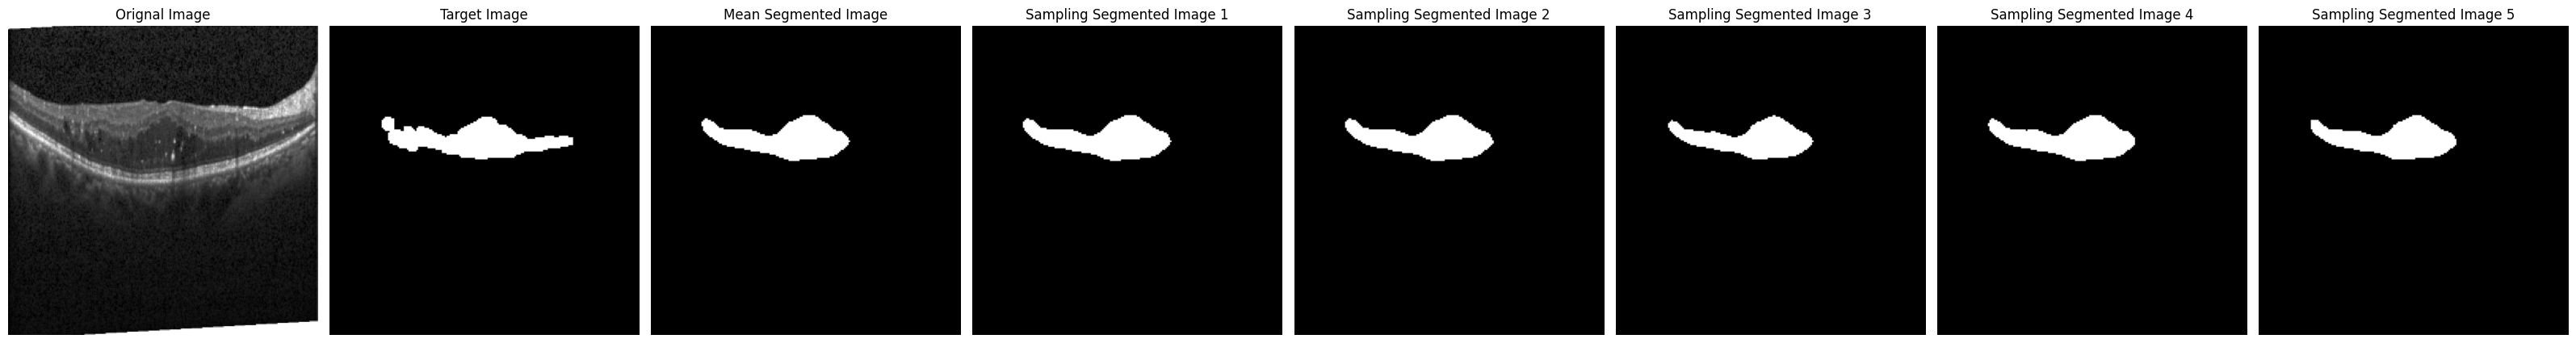

In [19]:
index = 10
fig, _ = plot_sample_examples(
        train_samplings['x'][index].squeeze(0).numpy(),
        train_samplings['y_true'][index].squeeze(0).numpy(),
        train_samplings['y_pred'][index]['mean_pred'].squeeze(0).numpy(),
        [i.squeeze(0).numpy() for i in train_samplings['y_pred'][index]['sampling_pred']]
    )
fig.tight_layout()

In [13]:
for index in range(len(train_samplings['x'])):
    fig, _ = plot_sample_examples(
        train_samplings['x'][index].squeeze(0).numpy(),
        train_samplings['y_true'][index].squeeze(0).numpy(),
        train_samplings['y_pred'][index]['mean_pred'].squeeze(0).numpy(),
        [i.squeeze(0).numpy() for i in train_samplings['y_pred'][index]['sampling_pred']]
    )
    fig.tight_layout()
    fig.savefig(f'../{checkpoint}/images_gray/train_samplings_{index}_gray.png')
    plt.close()

In [40]:
def plot_sample_examples(datax, datay, mean_y, sample_ys):
    image_num = len(sample_ys) + 3
    # fig, ax = plt.subplots(nrows=1, ncols=image_num, figsize=(4 * image_num, 4.5))
    fig, fig_dict = plt.subplot_mosaic('.ABC.;' + 'DEFGH', figsize=(3.5 * 5, 8))
    
    fig_dict['A'].imshow(np.transpose(datax, (1, 2, 0))[:, :, 0], cmap='gray')
    fig_dict['A'].set_title("Orignal Image")
    fig_dict['A'].set_axis_off()
    fig_dict['B'].imshow(np.transpose(datay, (1, 2, 0))[:, :, 0], cmap='gray')
    fig_dict['B'].set_title("Target Image")
    fig_dict['B'].set_axis_off()
    
    mean_y = np.argmax(mean_y, axis=0, keepdims=True)
    fig_dict['C'].imshow(np.transpose(mean_y, (1, 2, 0))[:, :, 0], cmap='gray')
    fig_dict['C'].set_title("Latent Mean Segmented Image")
    fig_dict['C'].set_axis_off()
    for i, sample_y in enumerate(sample_ys, 1):
        sub_index = 'DEFGH'
        sample_y = np.argmax(sample_y, axis=0, keepdims=True)
        fig_dict[sub_index[i - 1]].imshow(np.transpose(sample_y, (1, 2, 0))[:, :, 0], cmap='gray')
        fig_dict[sub_index[i - 1]].set_title(f"Sampled Segmented Image {i}")
        fig_dict[sub_index[i - 1]].set_axis_off()
        
    return fig, fig_dict

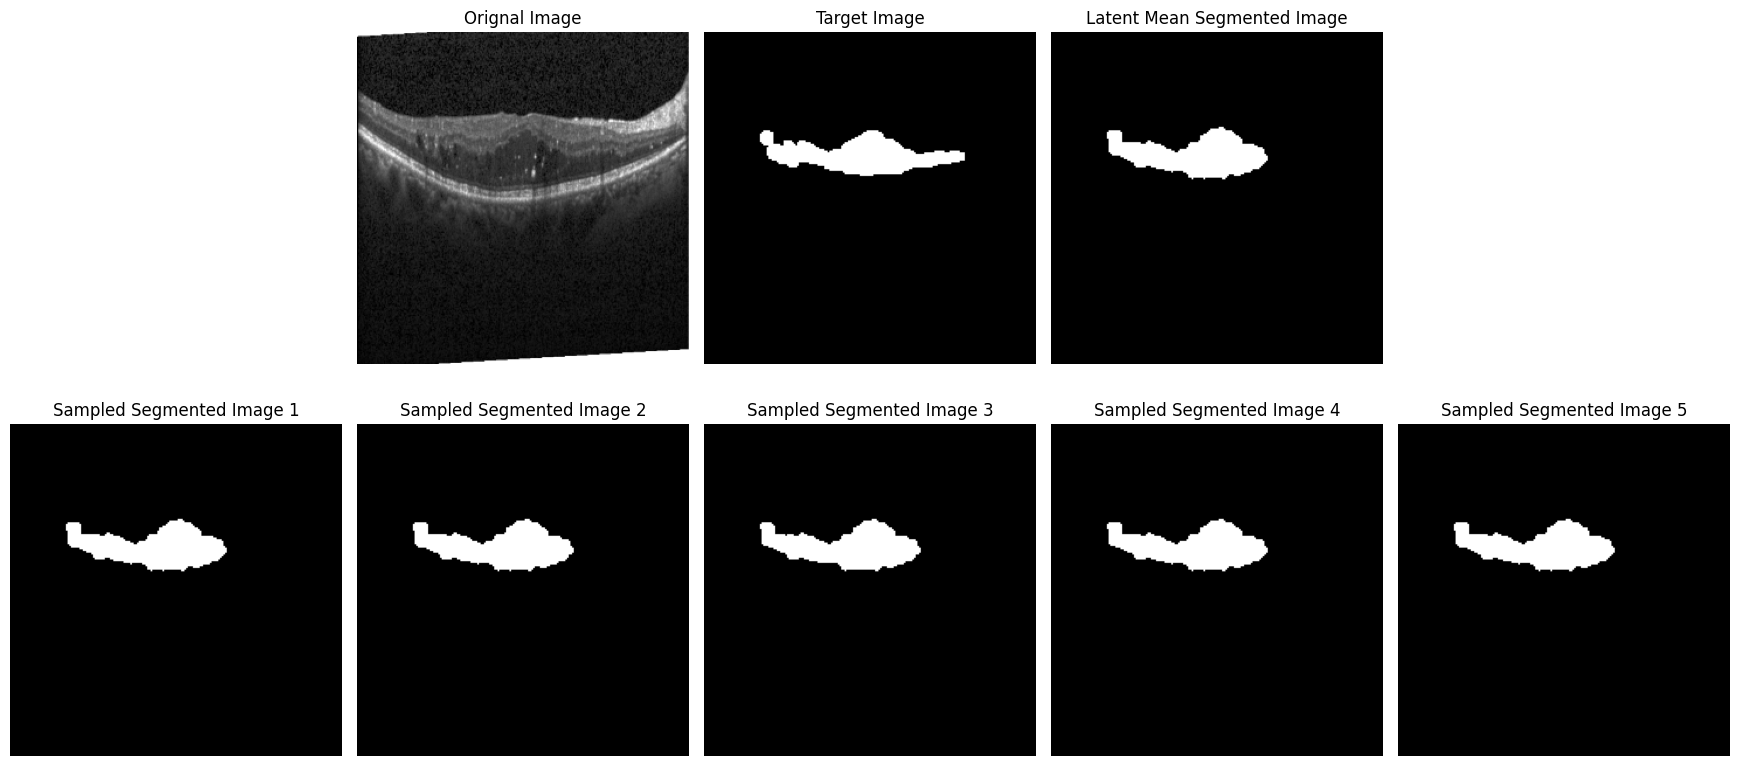

In [45]:
index = 10
fig, _ = plot_sample_examples(
        train_samplings['x'][index].squeeze(0).numpy(),
        train_samplings['y_true'][index].squeeze(0).numpy(),
        train_samplings['y_pred'][index]['mean_pred'].squeeze(0).numpy(),
        [i.squeeze(0).numpy() for i in train_samplings['y_pred'][index]['sampling_pred']]
    )
fig.tight_layout()

In [42]:
for index in range(len(train_samplings['x'])):
    fig, _ = plot_sample_examples(
        train_samplings['x'][index].squeeze(0).numpy(),
        train_samplings['y_true'][index].squeeze(0).numpy(),
        train_samplings['y_pred'][index]['mean_pred'].squeeze(0).numpy(),
        [i.squeeze(0).numpy() for i in train_samplings['y_pred'][index]['sampling_pred']]
    )
    fig.tight_layout()
    fig.savefig(f'../{checkpoint}/images_gray/train_samplings_{index}_gray.png')
    plt.close()

In [43]:
for index in range(len(train_samplings['x'])):
    fig, _ = plot_sample_examples(
        train_samplings['x'][index].squeeze(0).numpy(),
        train_samplings['y_true'][index].squeeze(0).numpy(),
        train_samplings['y_pred'][index]['mean_pred'].squeeze(0).numpy(),
        [i.squeeze(0).numpy() for i in train_samplings['y_pred'][index]['sampling_pred']]
    )
    fig.tight_layout()
    fig.savefig(f'../{checkpoint}/images_gray/train_samplings_{index}_gray.pdf')
    plt.close()

In [53]:
def plot_inference_examples(datax, datay, mean_y):
    fig, fig_dict = plt.subplot_mosaic('ABC', figsize=(3.5 * 3, 4))
    
    fig_dict['A'].imshow(np.transpose(datax, (1, 2, 0))[:, :, 0], cmap='gray')
    fig_dict['A'].set_title("Orignal Image")
    fig_dict['A'].set_axis_off()
    fig_dict['B'].imshow(np.transpose(datay, (1, 2, 0))[:, :, 0], cmap='gray')
    fig_dict['B'].set_title("Target Image")
    fig_dict['B'].set_axis_off()
    
    mean_y = np.argmax(mean_y, axis=0, keepdims=True)
    fig_dict['C'].imshow(np.transpose(mean_y, (1, 2, 0))[:, :, 0], cmap='gray')
    fig_dict['C'].set_title("Predicted Segmented Image")
    fig_dict['C'].set_axis_off() 
    return fig, fig_dict

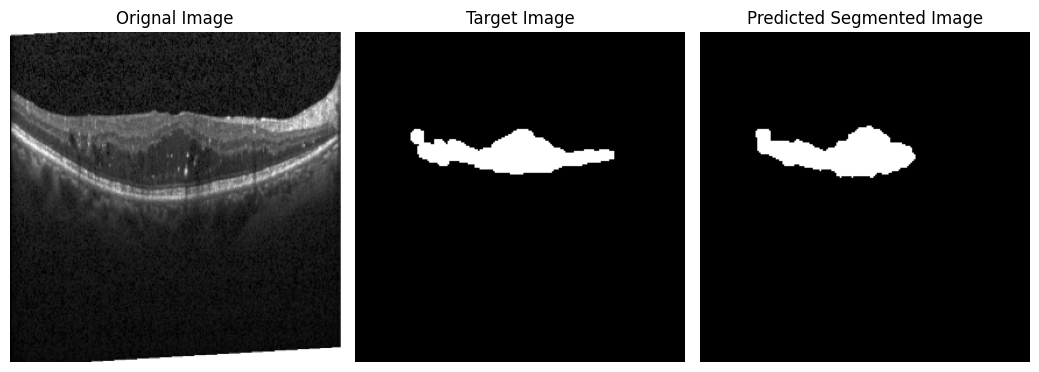

In [54]:
index = 10
fig, _ = plot_inference_examples(
        train_samplings['x'][index].squeeze(0).numpy(),
        train_samplings['y_true'][index].squeeze(0).numpy(),
        train_samplings['y_pred'][index]['mean_pred'].squeeze(0).numpy()
    )
fig.tight_layout()

In [57]:
for index in range(len(train_samplings['x'])):
    fig, _ = plot_inference_examples(
        train_samplings['x'][index].squeeze(0).numpy(),
        train_samplings['y_true'][index].squeeze(0).numpy(),
        train_samplings['y_pred'][index]['mean_pred'].squeeze(0).numpy()
    )
    fig.tight_layout()
    fig.savefig(f'../{checkpoint}/images_gray/test_samplings_{index}_gray.png')
    plt.close()

In [58]:
for index in range(len(train_samplings['x'])):
    fig, _ = plot_inference_examples(
        train_samplings['x'][index].squeeze(0).numpy(),
        train_samplings['y_true'][index].squeeze(0).numpy(),
        train_samplings['y_pred'][index]['mean_pred'].squeeze(0).numpy()
    )
    fig.tight_layout()
    fig.savefig(f'../{checkpoint}/images_gray/test_samplings_{index}_gray.pdf')
    plt.close()